<a href="https://colab.research.google.com/github/MBoerenko/Final-Project/blob/main/multiple_linear_regression_2019_batters_vs_2019_leaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [48]:
data = pd.read_csv('/content/drive/My Drive/Batters_Data_Sets/Multiple_Linear_Regression_for_Batters/multi_2019_batters_leaders.csv')
data.head()

,players,team,pos,age,g,ab,r,h,2b,3b,hr,rbi,sb,cs,bb,so,sh,sf,hbp,avg,obp,slg,ops
0,Whit Merrifield,KC,2B,31,162,681,105,206,41,10,16,74,20,10,45,126,0,4,5,0.302,0.348,0.463,0.811
1,Marcus Semien,OAK,SS,30,162,657,123,187,43,7,33,92,10,8,87,102,0,1,2,0.285,0.369,0.522,0.891
2,Rafael Devers,BOS,3B,24,156,647,129,201,54,4,32,115,8,8,48,119,1,2,4,0.311,0.361,0.555,0.916
3,Jonathan Villar,BAL,2B,29,162,642,111,176,33,5,24,73,40,9,61,176,2,4,4,0.274,0.339,0.453,0.792
4,Ozzie Albies,ATL,2B,23,160,640,102,189,43,8,24,86,15,4,54,112,0,4,4,0.295,0.352,0.500,0.852


In [49]:
#All X Values
# Assign the data to X and y
X = data[["age","g","ab","h","2b","3b","hr","rbi","sb","cs","bb","so","sh","sf","hbp","avg","obp","slg","ops"]]
y = data["r"].values.reshape(-1, 1)
print(X.shape, y.shape)

(829, 19) (829, 1)


In [50]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.24, shuffle=False)

### END SOLUTION

In [51]:
X_train

,age,g,ab,h,2b,3b,hr,rbi,sb,cs,bb,so,sh,sf,hbp,avg,obp,slg,ops
0,31,162,681,206,41,10,16,74,20,10,45,126,0,4,5,0.302,0.348,0.463,0.811
1,30,162,657,187,43,7,33,92,10,8,87,102,0,1,2,0.285,0.369,0.522,0.891
2,24,156,647,201,54,4,32,115,8,8,48,119,1,2,4,0.311,0.361,0.555,0.916
3,29,162,642,176,33,5,24,73,40,9,61,176,2,4,4,0.274,0.339,0.453,0.792
4,23,160,640,189,43,8,24,86,15,4,54,112,0,4,4,0.295,0.352,0.500,0.852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,30,12,17,4,1,0,1,2,0,0,2,4,0,0,0,0.235,0.316,0.471,0.787
626,40,6,17,1,0,0,0,0,0,0,0,8,0,0,0,0.059,0.059,0.059,0.118
627,37,9,17,4,0,0,1,3,0,0,3,4,0,0,0,0.235,0.350,0.412,0.762
628,32,8,16,1,0,0,0,2,0,0,1,6,0,0,0,0.063,0.118,0.063,0.181


In [52]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [53]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9742847728392956
Testing Score: 0.9762366778427306


Text(0.5, 1.0, 'Residual Plot')

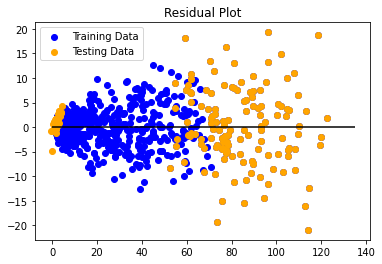

In [54]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [55]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [56]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [57]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

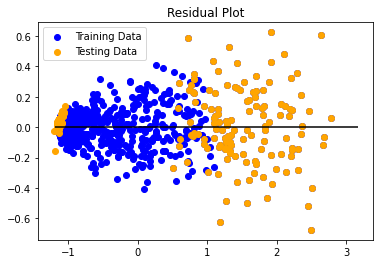

In [58]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [59]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE1 = mean_squared_error(y_test_scaled, predictions)
r21 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE1}, R2: {r21}")

MSE: 0.043139467927502784, R2: 0.9762366778427306


In [60]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso1a = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions1a = lasso1a.predict(X_test_scaled)

MSE1a = mean_squared_error(y_test_scaled, predictions)
r21a = lasso1a.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE1a}, R2: {r21a}")

MSE: 0.043139467927502784, R2: 0.9730949771134014


In [61]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions1b = ridge.predict(X_test_scaled)

MSE1b = mean_squared_error(y_test_scaled, predictions1b)
r21b = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE1b}, R2: {r21b}")

MSE: 0.04313483311149034, R2: 0.9762392309253561


In [62]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions1c = elasticnet.predict(X_test_scaled)

MSE1c = mean_squared_error(y_test_scaled, predictions1c)
r21c = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE1c}, R2: {r21c}")

MSE: 0.04687978255329813, R2: 0.9741763301914409


In [63]:
#multiple regression of "Triple Crown"

# Assign the data to X and y
X2 = data[["hr","rbi","avg"]]
y2 = data["r"].values.reshape(-1, 1)
print(X.shape, y.shape)

(829, 19) (829, 1)


In [64]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.24, shuffle=False)

### END SOLUTION

In [65]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
### END SOLUTION

In [66]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model2.fit(X_train, y_train)
training_score2 = model2.score(X_train, y_train)
testing_score2 = model2.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score2}")
print(f"Testing Score: {testing_score2}")

Training Score: 0.8882930549987295
Testing Score: 0.8773236083267314


Text(0.5, 1.0, 'Residual Plot')

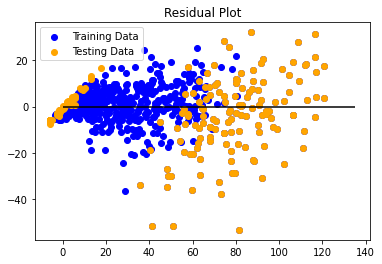

In [67]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model2.predict(X_train), model2.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model2.predict(X_test), model2.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [68]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler2 = StandardScaler().fit(X_train)
y_scaler2 = StandardScaler().fit(y_train)
### END SOLUTION

In [69]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled2 = X_scaler2.transform(X_train)
X_test_scaled2 = X_scaler2.transform(X_test)
y_train_scaled2 = y_scaler2.transform(y_train)
y_test_scaled2 = y_scaler2.transform(y_test)
### END SOLUTION

In [70]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train_scaled2, y_train_scaled2)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

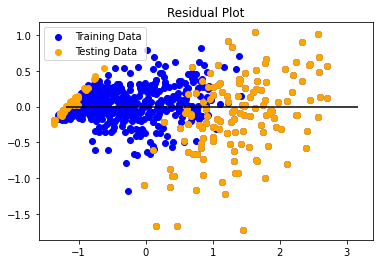

In [71]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions2 = model2.predict(X_test_scaled2)
model2.fit(X_train_scaled2, y_train_scaled2)
plt.scatter(model2.predict(X_train_scaled2), model2.predict(X_train_scaled2) - y_train_scaled2, c="blue", label="Training Data")
plt.scatter(model2.predict(X_test_scaled2), model2.predict(X_test_scaled2) - y_test_scaled2, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled2.min(), xmax=y_test_scaled2.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [72]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE2 = mean_squared_error(y_test_scaled2, predictions2)
r22 = model2.score(X_test_scaled2, y_test_scaled2)
### END SOLUTION

print(f"MSE: {MSE2}, R2: {r22}")

MSE: 0.22270430998772647, R2: 0.8773236083267318


In [73]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso2a = Lasso(alpha=.01).fit(X_train_scaled2, y_train_scaled2)

predictions2a = lasso2a.predict(X_test_scaled2)

MSE2a = mean_squared_error(y_test_scaled2, predictions2)
r22a = lasso2a.score(X_test_scaled2, y_test_scaled2)
### END SOLUTION

print(f"MSE: {MSE2a}, R2: {r22a}")

MSE: 0.22270430998772647, R2: 0.8775988468271152


In [74]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge2b = Ridge(alpha=.01).fit(X_train_scaled2, y_train_scaled2)

predictions2b = ridge2b.predict(X_test_scaled2)

MSE2b = mean_squared_error(y_test_scaled2, predictions2b)
r22b = ridge2b.score(X_test_scaled2, y_test_scaled2)
### END SOLUTION

print(f"MSE: {MSE2b}, R2: {r22b}")

MSE: 0.22270539131547298, R2: 0.8773230126786898


In [75]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet2c = ElasticNet(alpha=.01).fit(X_train_scaled2, y_train_scaled2)

predictions2c = elasticnet2c.predict(X_test_scaled2)

MSE2c = mean_squared_error(y_test_scaled2, predictions2)
r22c = elasticnet2c.score(X_test_scaled2, y_test_scaled2)
### END SOLUTION

print(f"MSE: {MSE2c}, R2: {r22c}")

MSE: 0.22270430998772647, R2: 0.8772604189619752


In [76]:
#What I think the new Triple Crown Should be, based on Top Correlations to Run Scored

# Assign the data to X and y
X3 = data[["slg","rbi","hr"]]
y3 = data["r"].values.reshape(-1, 1)
print(X.shape, y.shape)

(829, 19) (829, 1)


In [77]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
### END SOLUTION

In [78]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model3.fit(X_train, y_train)
training_score3 = model3.score(X_train, y_train)
testing_score3 = model3.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score3}")
print(f"Testing Score: {testing_score3}")

Training Score: 0.8882930549987295
Testing Score: 0.8773236083267314


Text(0.5, 1.0, 'Residual Plot')

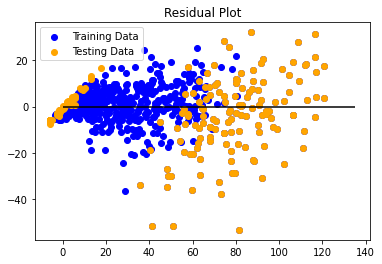

In [79]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model3.predict(X_train), model3.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model3.predict(X_test), model3.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [80]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler3 = StandardScaler().fit(X_train)
y_scaler3 = StandardScaler().fit(y_train)
### END SOLUTION

In [81]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled3 = X_scaler3.transform(X_train)
X_test_scaled3 = X_scaler3.transform(X_test)
y_train_scaled3 = y_scaler3.transform(y_train)
y_test_scaled3 = y_scaler3.transform(y_test)
### END SOLUTION

In [82]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X_train_scaled3, y_train_scaled3)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

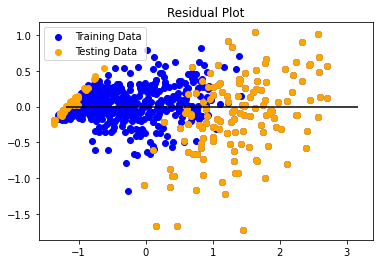

In [83]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions3 = model3.predict(X_test_scaled3)
model3.fit(X_train_scaled3, y_train_scaled3)
plt.scatter(model3.predict(X_train_scaled3), model3.predict(X_train_scaled3) - y_train_scaled3, c="blue", label="Training Data")
plt.scatter(model3.predict(X_test_scaled3), model3.predict(X_test_scaled3) - y_test_scaled3, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled3.min(), xmax=y_test_scaled3.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [84]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE3 = mean_squared_error(y_test_scaled3, predictions3)
r23 = model3.score(X_test_scaled3, y_test_scaled3)
### END SOLUTION

print(f"MSE: {MSE3}, R2: {r23}")

MSE: 0.22270430998772647, R2: 0.8773236083267318


In [85]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso3a = Lasso(alpha=.01).fit(X_train_scaled3, y_train_scaled3)

predictions3a = lasso3a.predict(X_test_scaled3)

MSE3a = mean_squared_error(y_test_scaled3, predictions3a)
r23a = lasso3a.score(X_test_scaled3, y_test_scaled3)
### END SOLUTION

print(f"MSE: {MSE3a}, R2: {r23a}")

MSE: 0.22220464742450738, R2: 0.8775988468271152


In [86]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge3b = Ridge(alpha=.01).fit(X_train_scaled3, y_train_scaled3)

predictions3b = ridge3b.predict(X_test_scaled3)

MSE3b = mean_squared_error(y_test_scaled3, predictions3b)
r23b = ridge2b.score(X_test_scaled3, y_test_scaled3)
### END SOLUTION

print(f"MSE: {MSE3b}, R2: {r23b}")

MSE: 0.22270539131547298, R2: 0.8773230126786898


In [88]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet3c = ElasticNet(alpha=.01).fit(X_train_scaled3, y_train_scaled3)

predictions3c = elasticnet3c.predict(X_test_scaled3)

MSE3c = mean_squared_error(y_test_scaled3, predictions3c)
r23c = elasticnet3c.score(X_test_scaled3, y_test_scaled3)
### END SOLUTION

print(f"MSE: {MSE3c}, R2: {r23c}")

MSE: 0.2228190227183893, R2: 0.8772604189619752
